In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.style.use("ggplot")

In [2]:
# ml
fillVolume = 5
# convert to SI-units
fillVolume = fillVolume * 1e-3

# Seconds
testOne = np.array([5.55, 5.51, 5.15, 4.96, 5.01])
meanOne = np.mean(testOne)
# 1,75 +- 0,07 mm
diameterOne = 1.75

testTwo = np.array([7.62, 9.07, 8.94, 9.19, 9.56])
meanTwo = np.mean(testTwo)
# 1,54 +- 0,07 mm
diameterTwo = 1.54

testThree = np.array([12.88, 13.65, 13.48, 12.67, 13.53])
meanThree = np.mean(testThree)
# 1,37 +- 0,04 mm
diameterThree = 1.37

testFour = np.array([36.86, 38.0, 36.81, 38.02, 36.55])
meanFour = np.mean(testFour)
# 1,07 +- 0,04 mm
diameterFour = 1.07

# Only 1 test was performed, which is why this is ignored.
#testFive = np.array([194.48])
#meanFive = np.mean(testFive)
# 0,88 +- 0,04 mm
#diameterFive = 0.88

meanTests = np.array([meanOne, meanTwo, meanThree, meanFour])
diameters = np.array([diameterOne, diameterTwo, diameterThree, diameterFour])
# Convert diameter to SI units
diameters = np.multiply(diameters, 1e-3)

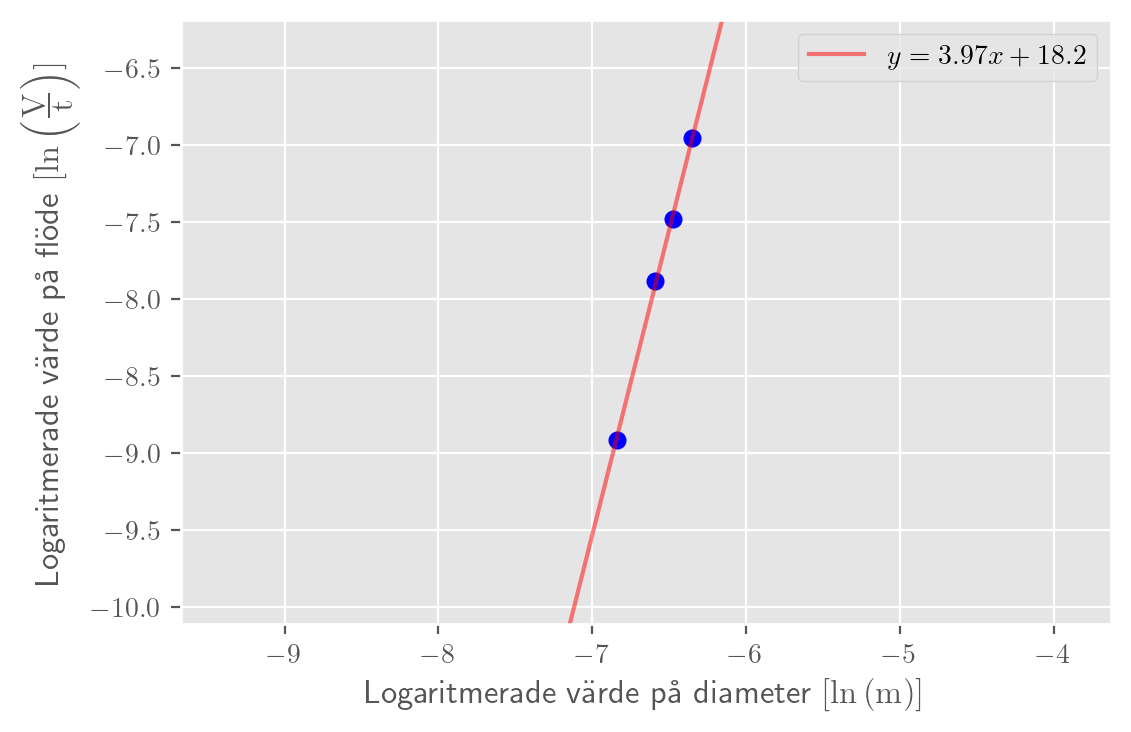

array([ 3.96558481, 18.22294978])

In [3]:
# Calculate flowrate
flowRates = np.divide(fillVolume, meanTests)

# Logarithmic flow
lnFlowRate = np.log(flowRates)

# Logarithmic diameter
lnDiameters = np.log(diameters)

# Fits the data to a graph using least squares
poly = np.polyfit(lnDiameters, lnFlowRate, 1)
# Gets two values for the line
x1, x2 = -6.2, -7.1
y1, y2 = x1*poly[0] + poly[1], x2*poly[0] + poly[1]

# Plot points
plt.scatter(lnDiameters, lnFlowRate, color="blue")
# Plot line
#plt.plot([x1, x2], [y1, y2], 'r-', alpha=0.5)
plt.axline((x1, y1), (x2, y2), alpha=0.5, color="red", label=r'$y = 3.97x + 18.2$')
plt.gcf().set_dpi(200)
ax = plt.gca()
ax.axis("equal")
plt.xlabel(r'Logaritmerade värde på diameter $[\ln \left( \textrm{m}'
             r'\right)]$')
plt.ylabel(r'Logaritmerade värde på flöde $[\ln\left('
             r'\frac{\textrm{V}}{\textrm{t}}\right)]$')
plt.legend()
plt.show()
poly